### 1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr², donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.

In [2]:
# Cargando DS y librerías
import pandas as pd
import numpy as np

df = pd.read_csv("Fish.csv")

# Calculando volumen de pez como cilindro
df["volumen_pez"]=np.pi*df['Height']*(df['Width']/2)**2

# Mostrando los tipos de datos de las columnas
df.dtypes


Species         object
Weight         float64
Length1        float64
Length2        float64
Length3        float64
Height         float64
Width          float64
volumen_pez    float64
dtype: object

### 2. Verifica la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación entre el peso y longitudes de los peces, altura y ancho al añadir el volumen? Explica.

Columnas disponibles en el dataset:
Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'volumen_pez'],
      dtype='object')
Correlación con el peso:
 Weight         1.000000
Length3        0.923044
Length2        0.918618
Length1        0.915712
Width          0.886507
volumen_pez    0.881981
Height         0.724345
Name: Weight, dtype: float64


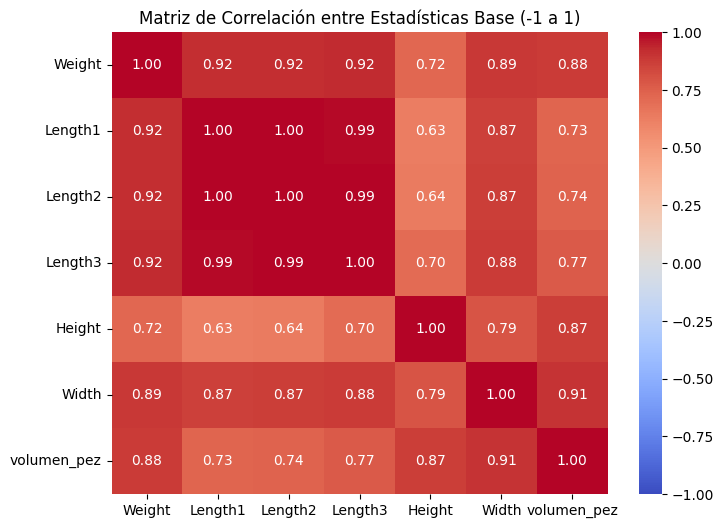

In [3]:
# Cargando librerias respectivas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Verificamos las columnas disponibles
print("Columnas disponibles en el dataset:")
print(df.columns)

# Seleccionamos solo las variables numéricas que nos interesan
columnas_seleccionadas = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width','volumen_pez']
df_numeric = df[columnas_seleccionadas].dropna() #Se eliminan datos sin valores faltantes

# Mostramos las primeras filas
df_numeric.head()

# Calcular y mostrar la correlación numérica con respecto al peso
matriz_correlacion = df.corr(numeric_only=True)
correlacion_con_peso = matriz_correlacion["Weight"].sort_values(ascending=False)
print("Correlación con el peso:\n", correlacion_con_peso)

# Visualizar la matriz completa con escala de -1 a 1
plt.figure(figsize=(8, 6))
plt.title("Matriz de Correlación entre Estadísticas Base (-1 a 1)")
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()


#### Conclusiones: De acuerdo a la matriz de correlación, existe una fuerte correlación entre los tres tipos de largos de los peces tiene una fuerte correlación con el peso. Al incluir la variable volumen, también se aprecia una correlación potente entre ambas.

### 3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.

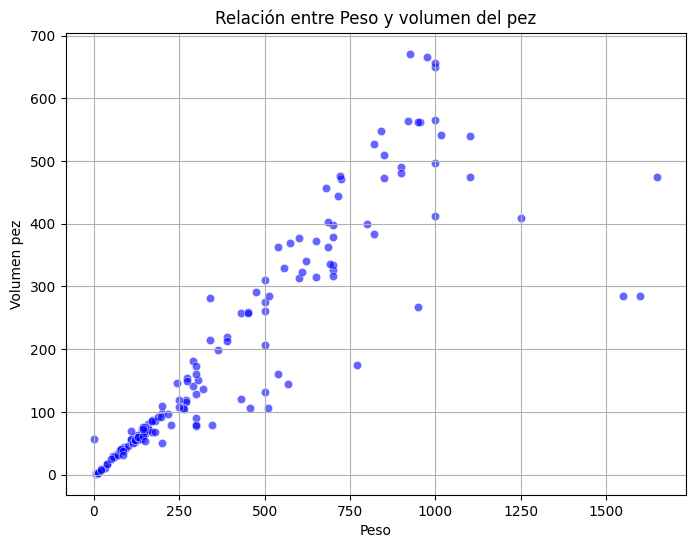

In [22]:
# Visualización inicial entre volumen y peso de los peces
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numeric, x='Weight', y='volumen_pez', color='blue', alpha=0.6)
plt.title("Relación entre Peso y volumen del pez")
plt.xlabel("Peso")
plt.ylabel("Volumen pez")
plt.grid(True)
plt.show()


In [4]:
#Para obtener β1 y β0
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Definimos X e y
X = df_numeric[['Weight']]  # variable explicativa como DataFrame
y = df_numeric['volumen_pez']     # variable objetivo como Serie

# Dividimos el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
modelo = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Obtenemos el coeficiente (pendiente) y el intercepto
print(f"Coeficiente β1 (pendiente): {modelo.coef_[0]:.4f}")
print(f"Intercepto β0: {modelo.intercept_:.4f}")

Coeficiente β1 (pendiente): 0.4245
Intercepto β0: 24.3060


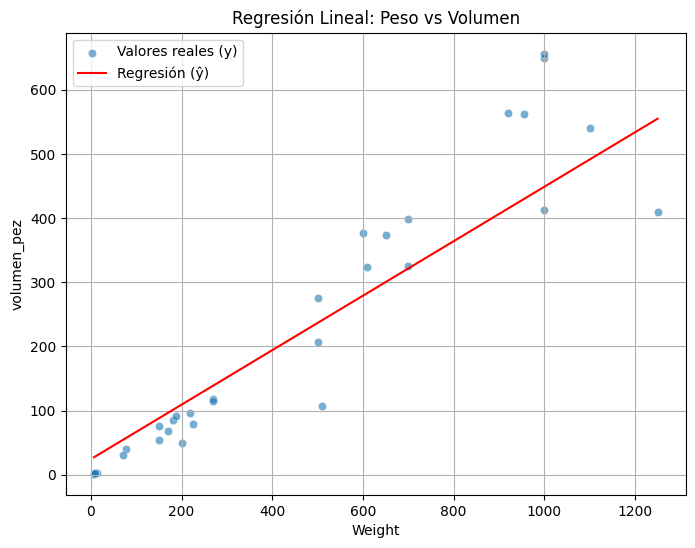

In [5]:
# Predicciones con el modelo
y_pred = modelo.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Weight'], y=y_test, label='Valores reales (y)', alpha=0.6)
sns.lineplot(x=X_test['Weight'], y=y_pred, color='red', label='Regresión (ŷ)')
plt.title("Regresión Lineal: Peso vs Volumen")
plt.xlabel("Weight")
plt.ylabel("volumen_pez")
plt.legend()
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:            volumen_pez   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     549.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.65e-53
Time:                        01:29:01   Log-Likelihood:                -932.49
No. Observations:                 159   AIC:                             1869.
Df Residuals:                     157   BIC:                             1875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0912     10.198      1.676      0.0

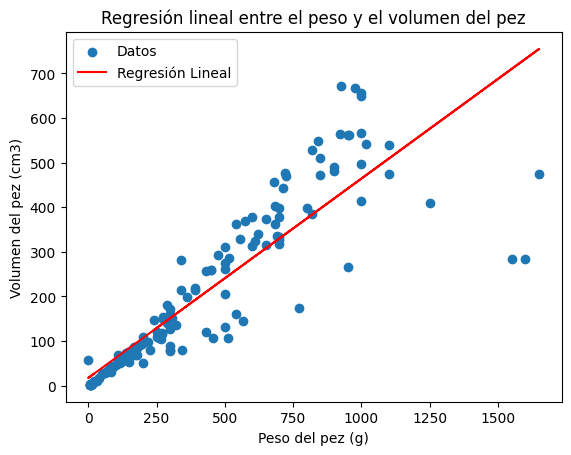

In [33]:
# Ocupando modelo de regresión líneal con statsmodels
import statsmodels.api as sm

#Definir las variables predictoras (X) y la variable de respuesta (y)
X = df["Weight"]
y = df["volumen_pez"]

# Agregar una constante al predictor (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los resultados del modelo
results = model.summary()

# Imprimir los resultados
print(results)

# Graficar la regresión lineal
plt.scatter(df["Weight"], df["volumen_pez"], label="Datos")
plt.plot(df["Weight"], model.predict(X), color='red', label="Regresión Lineal")
plt.title("Regresión lineal entre el peso y el volumen del pez")
plt.xlabel("Peso del pez (g)")
plt.ylabel("Volumen del pez (cm3)")
plt.legend()
plt.show()



#### Interpretando datos:
#### El intercepto 17.0912 del volumen del pez cuando la masa del pez es casi 0, podria tener sentido en peces pequeños.
#### El peso 0.447 (weight) por cada 1 gr de masa corporal adicional del pez, el volumen de cada pez sube alrededor de 0.45 cm3
#### R2 es igual a 77.8% .Indica que la inclusión de variables es relevante

### 4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Ver que nombres de especies son para trabajar cada dato por separado
print(df['Species'].unique())

# Obteniendo listado de especies de peces
lista_especies = df['Species'].unique()

# Lista para almacenar los resultados
medidas_por_especie = []

# Aplicando modelo por cada especie
for species in lista_especies:
    datos_especies = df[df['Species'] == species]
    X = datos_especies[['volumen_pez']]
    y = datos_especies['Weight']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

# Calculando metricas
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y, y_pred)

    medidas_por_especie.append({
        'Species': species,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R2': round(r2, 4)
    })

# Convertir a DataFrame y mostrar
df_medidas_por_especie = pd.DataFrame(medidas_por_especie)
print(df_medidas_por_especie)


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
     Species     MAE       MSE    RMSE      R2
0      Bream   53.69   4348.35   65.94  0.8977
1      Roach   16.00    835.83   28.91  0.8885
2  Whitefish   69.80  11147.58  105.58  0.8604
3     Parkki    4.47     25.59    5.06  0.9955
4      Perch   40.18   3835.98   61.94  0.9677
5       Pike  125.09  36222.43  190.32  0.8424
6      Smelt    1.20      1.93    1.39  0.8780


#### Conclusiones: 
#### - El R2 de las especies Parkki y Perch es muy cercano a 1, por lo que podría decirse que casi todo el peso se explica por el volumen
#### - MAE y RMSE altos en las especies Pike y Whitefish probablemente porque tienen menos datos 
#### - Separar por especie mejora la precisión de las mediciones en comparación con un modelo general

### 5. Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.

In [17]:
# Se utilizarán las variables que tienen mayor correlación con la variable peso. Estas son: Lenght3, Height, Width y Volumen

# Seleccionar variables predictoras
X = df[['Length3', 'Height', 'Width','volumen_pez']]
y = df['Weight']

# Entrenando el modelo
model = LinearRegression()
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Métricas de evaluación
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y, y_pred)
n = len(y)
p = X.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Mostrar resultados
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))
print("R² ajustado:", round(r2_adj, 4))

MAE: 49.33
MSE: 6632.29
RMSE: 81.44
R²: 0.9479
R² ajustado: 0.9466


#### Conclusiones: El modelo de regresión que utiliza múltiples variables físicas del pez —longitud (Length3), altura, ancho y volumen, se ve una alta precisión en la predicción del peso, con un R² ajustado cercano al 95%. Esto indica que el modelo explica gran parte de la variabilidad del peso basándose únicamente en características físicas medibles.